In [216]:
import numpy as np
import networkx as nx
import math
from numpy import random
import matplotlib as mpl
import matplotlib.pyplot as plt
from qiskit import Aer, BasicAer
from qiskit.algorithms.minimum_eigensolvers import QAOA, NumPyMinimumEigensolver
from pytket.extensions.qiskit import AerBackend, AerStateBackend
from qiskit.algorithms.optimizers import COBYLA
from qiskit.primitives import Sampler
from qiskit.algorithms.optimizers import SPSA
from qiskit.circuit.library import TwoLocal
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit_optimization.applications import VehicleRouting
from qiskit_optimization.problems import QuadraticProgram
from qiskit_optimization.algorithms import OptimizationResult
from qiskit_optimization.problems.quadratic_program import QuadraticProgram
from qiskit_optimization.translators import from_docplex_mp
from qiskit_optimization.problems import QuadraticProgram
from qiskit_optimization.converters import QuadraticProgramToQubo

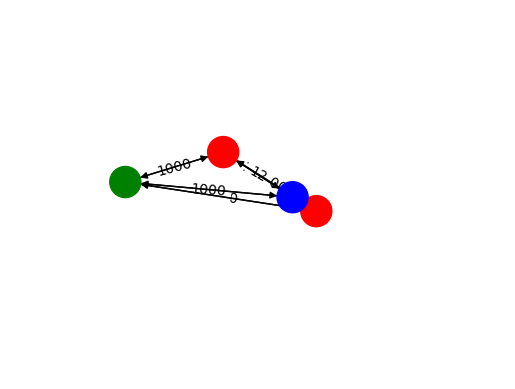

In [217]:
SDG11_5 = nx.DiGraph()

'''attrs = {0: {"pos":(37.12867427784962, 36.20599792960348), "color": "red"}, 
         1: {"pos":(37.13405298499115, 36.20201712645157), "color": "red"},
         2: {"pos":(37.1326826137449, 36.202957056564465), "color": "blue"}, 
         3: {"pos":(37.13240853949565, 36.21169233768591), "color": "blue"},
         4: {"pos":(37.12302149645884, 36.20397990886314), "color": "green"}, 
         5: {"pos": (37.14004835919349, 36.211775262897916), "color": "green"}}
nx.set_node_attributes(SDG11_5, attrs)

# Add nodes to the graph
node_names = [0,1,2,3,4,5]'''



attrs = {0: {"pos":(37.12867427784962, 36.20599792960348), "color": "red"}, 
         1: {"pos":(37.13405298499115, 36.20201712645157), "color": "red"},
         2: {"pos":(37.1326826137449, 36.202957056564465), "color": "blue"},
         3: {"pos":(37.12302149645884, 36.20397990886314), "color": "green"}}
nx.set_node_attributes(SDG11_5, attrs)

# Add nodes to the graph
node_names = [0,1,2,3]


for node in node_names:
    SDG11_5.add_node(node, pos=attrs[node]['pos'], color=attrs[node]['color'])

#Create adjacency matrix


'''adjacency = [[1000, 1000, 1000, 1000, 25, 11],
             [1000, 1000, 1000, 1000, 4, 21],
             [12, 17, 1000, 1000, 1000, 1000],
             [9, 8, 1000, 1000, 1000, 1000],
             [1000, 1000, 1000, 1000, 1000, 1000],
             [1000, 1000, 1000, 1000, 1000, 1000]]'''

'''adjacency = [[math.inf, math.inf, math.inf, math.inf, 25, 11],
             [math.inf, math.inf, math.inf, math.inf, 4, 21],
             [12, 17, math.inf, math.inf, math.inf, math.inf],
             [9, 8, math.inf, math.inf, math.inf, math.inf],
             [math.inf, math.inf, math.inf, math.inf, math.inf, math.inf],
             [math.inf, math.inf, math.inf, math.inf, math.inf, math.inf]]'''

'''adjacency = [[math.inf, math.inf, math.inf, 11],
             [math.inf, math.inf, math.inf, 4],
             [12, 17, math.inf, math.inf],
             [math.inf, math.inf, math.inf, math.inf]]'''


adjacency = [[1000, 1000, 1000, 11],
             [1000, 1000, 1000, 4],
             [12, 17, 1000, 1000],
             [1000, 1000, 1000, 1000]]

# Add edges to the graph
for i in range(len(node_names)):
    for j in range(len(node_names)):
        if i != j:
              SDG11_5.add_edge(node_names[i], node_names[j], weight = adjacency[i][j])

# Draw the graph
pos = nx.get_node_attributes(SDG11_5, 'pos')
colors = nx.get_node_attributes(SDG11_5, 'color')
nx.draw_networkx_edge_labels(SDG11_5, pos=pos, edge_labels=nx.get_edge_attributes(SDG11_5, 'weight'))
nx.draw(SDG11_5, pos, node_color=list(colors.values()), node_size=500)
plt.show()

In [218]:
for e in SDG11_5.edges():
    #print(e, SDG11_5[e[0]][e[1]]['weight'])
    pass

In [219]:
dummy = VehicleRouting(SDG11_5, 1, 3)
dum2 = dummy.to_quadratic_program()
print(dum2.prettyprint())
qub = QuadraticProgramToQubo()
dummy_qubo = qub.convert(dum2)
qubitOp, offset = dummy_qubo.to_ising()

#print(qubitOp)


Problem name: Vehicle routing

Minimize
  1000*x_0_1 + 12*x_0_2 + 1000*x_0_3 + 1000*x_1_0 + 17*x_1_2 + 1000*x_1_3
  + 12*x_2_0 + 17*x_2_1 + 1000*x_2_3 + 1000*x_3_0 + 1000*x_3_1 + 1000*x_3_2

Subject to
  Linear constraints (12)
    x_0_1 + x_0_2 + x_0_3 == 1  'c0'
    x_1_0 + x_1_2 + x_1_3 == 1  'c1'
    x_2_0 + x_2_1 + x_2_3 == 1  'c2'
    x_1_0 + x_2_0 + x_3_0 == 1  'c3'
    x_0_1 + x_2_1 + x_3_1 == 1  'c4'
    x_0_2 + x_1_2 + x_3_2 == 1  'c5'
    x_0_3 + x_1_3 + x_2_3 == 1  'c6'
    x_3_0 + x_3_1 + x_3_2 == 1  'c7'
    x_0_1 + x_1_0 <= 1  'c8'
    x_0_2 + x_2_0 <= 1  'c9'
    x_1_2 + x_2_1 <= 1  'c10'
    x_0_1 + x_0_2 + x_1_0 + x_1_2 + x_2_0 + x_2_1 <= 2  'c11'

  Binary variables (12)
    x_0_1 x_0_2 x_0_3 x_1_0 x_1_2 x_1_3 x_2_0 x_2_1 x_2_3 x_3_0 x_3_1 x_3_2



In [220]:
min_solve = NumPyMinimumEigensolver()
min_eigen = min_solve.compute_minimum_eigenvalue(qubitOp)
x=0
for i in min_eigen.eigenstate:
    if i != 0:
        print(i, x)
    x+=1

#print(min_eigen)
#print(len(min_eigen.eigenstate))

(1+0j) 674


In [221]:
#####exact sol'n#####
min_solve = NumPyMinimumEigensolver()
min_exact = MinimumEigenOptimizer(min_solve)
min_eigen = min_exact.solve(dum2)
'''x=0
for i in min_eigen.eigenstate:
    if i != 0:
        print(i, x)
    x+=1'''

#print(min_eigen.prettyprint())
print('')


'x=0\nfor i in min_eigen.eigenstate:\n    if i != 0:\n        print(i, x)\n    x+=1'

In [222]:
#####QAOA approximation#####
qaoa_solve = QAOA(sampler=Sampler(), optimizer=COBYLA(), initial_point=[0.0, 0.0])
qaoa_opt = MinimumEigenOptimizer(qaoa_solve)
qaoa_result = qaoa_opt.solve(dum2)

#print(qaoa_result.prettyprint())

In [225]:
vals = []
for i in qaoa_result:
    vals.append(i)

edge_res = []
for i in qaoa_result.variables:
    edge_res.append(i.as_tuple()[0])

res_pairs = []
for i in range(len(vals)):
    if vals[i] != 0:
        res_pairs.append([vals[i], int(edge_res[i][2]), int(edge_res[i][4])])


sum_cost = 0
route = []
for i in res_pairs:
    if adjacency[i[1]][i[2]] != 1000:
        sum_cost += i[0]*adjacency[i[1]][i[2]]
        route.append((i[1], i[2]))

route.sort()
route.reverse()
print("Final route: ")
for i in route:
    print("Point", i[0], "to point", i[1], "(" + str(adjacency[i[0]][i[1]])+ " minutes)")
print("Total time to rescue and dropoff:", sum_cost, "minutes.")

Final route: 
Point 2 to point 1 (17 minutes)
Point 1 to point 3 (4 minutes)
Total time to rescue and dropoff: 21.0 minutes.


In [224]:

provider = IBMProvider()


backend = provider.get_backend("ibmq_belem")



IBMQAccountCredentialsNotFound: 'No IBM Quantum Experience credentials found.'

In [ ]:
#####QAOA approximation#####
backend = AerBackend()
seed = 50
#quantum_instance = QuantumInstance(backend=backend, seed_simulator=seed, seed_transpiler=seed)
#result = qaoa.run(quantum_instance)


qaoa_obj = QAOA(sampler=Sampler(), optimizer=COBYLA(), initial_point=[0.0, 0.0])
qaoa_solve = qaoa_obj.run(QuantumInstance(backend=backend, seed_simulator = seed, seed_transpiler = seed))
qaoa_opt = MinimumEigenOptimizer(qaoa_solve)
qaoa_result = qaoa_opt.solve(dum2)

print(qaoa_result.prettyprint())


AttributeError: 'QAOA' object has no attribute 'run'

In [ ]:
from qiskit import Aer, BasicAer
from qiskit.aqua import get_aer_backend, QuantumInstance
from qiskit.aqua.algorithms import QAOA
from qiskit.aqua.components.optimizers import COBYLA
from qiskit.aqua.operators.weighted_pauli_operator import WeightedPauliOperator
from qiskit.quantum_info import Pauli

def qaoa_test(module):
    qubitOp = WeightedPauliOperator(paulis=[
        [ 1, Pauli([ True, True, False ], [ True, True, False ]) ],
        [ 1, Pauli([ False, True, True ], [ False, True, True ]) ],
        [ 1, Pauli([ True, False, True ], [ True, False, True ]) ]
    ])
    backend = module.get_backend("statevector_simulator")
    seed = 50
    cobyla = COBYLA()
    cobyla.set_options(maxiter=250)
    qaoa = QAOA(qubitOp, cobyla, 1)
    qaoa.random_seed = seed
    quantum_instance = QuantumInstance(backend=backend, seed_simulator=seed, seed_transpiler=seed)
    result = qaoa.run(quantum_instance)
    return result

result_basic_aer, result_aer = qaoa_test(BasicAer), qaoa_test(Aer)
display(result_basic_aer, result_aer)